In [ ]:
from IPython.core.display import display_html
display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)

In [1]:
from sys import path; path.insert(1,"../src");
import fubar; from importlib import reload; reload(fubar);

***
< [GMIT Data Analytics](https://web.archive.org/web/20201029063153/https://www.gmit.ie/computer-science-and-applied-physics/higher-diploma-science-computing-data-analytics-ict) | [Home](https://github.com/SeanOhAileasa) | [README](https://github.com/SeanOhAileasa/fda-simulation/blob/main/README.md) >

[![GMIT](https://github.com/SeanOhAileasa/SeanOhAileasa/blob/master/rc/gmit.png?raw=true)](https://web.archive.org/web/20201029063153/https://www.gmit.ie/computer-science-and-applied-physics/higher-diploma-science-computing-data-analytics-ict)

## Fundamentals of Data Analysis - Course Material 2020
### Topic: [Simulation](https://nbviewer.jupyter.org/github/SeanOhAileasa/fda-simulation/blob/main/fda-simulation.ipynb)
***

Course material for the ``Fundamentals of Data Analysis`` module (5 Credits) of the ``Higher Diploma in Science in Computing (Data Analytics) (H.Dip)`` programme (75 Credits) at **Galway-Mayo Institute of Technology (GMIT)**.

- referenced external link - [Machine Learning & Statistics](https://nbviewer.jupyter.org/github/SeanOhAileasa/mls-machine-learning-statistics/blob/main/mls-machine-learning-statistics.ipynb)

In [2]:
from sys import path; path.insert(1,"../src")
from fubar import fFile

In [3]:
%%script bash
grep -1 "def fFile" ../src/fubar.py -A 9

# repository ./SeanOhAileasa
def fFile(nParPath):
    """Start a file with its associated application.

Input: nParPath
Process: (os.path.realpath; os.startfile)
Output: file opened with associated application
"""
    from os import path,startfile
    return startfile(path.realpath(nParPath))
# --- END ---


In [ ]:
fFile("./hide/024-Plotting an equation - 18-10-2020.mp4")

<a id="top"></a>
***
## Table of Contents
***

## [Abstract](#abstract)

## [Introduction](#introduction)

## [Solution](#solution)

* [Wind](#fdaSimulationSolutionWind) $(u)$
    * [Simulate](#fdaSimulationSolutionWindSimulate)
        * [``numpy``](#fdaSimulationSolutionnumpy)
            * [``linspace``](#fdaSimulationSolutionnumpylinspace)
            
            
* [Power](#fdaSimulationSolutionPower) $(P)$
    * [``numpy``](#fdaSimulationSolutionPowernumpy) &#x1F6A7; (&#8594; Wind $(u)$ &#8594; Simulate)
        * [``exp``](#fdaSimulationSolutionPowernumpyexp)
        

* [Dataset](#fdaSimulationSolutionPu) $P(u)$
    * [``pandas``](#fdaSimulationSolutionWindPandas)
        * [``DataFrame``](#fdaSimulationSolutionWindPandasDataFrame)

## [Conclusion](#conclusion)

* [Plot](#fdaSimulationConclusionPlot)
    * [``seaborn``](#fdaSimulationConclusionPlotseaborn)
        * [``scatterplot``](#fdaSimulationConclusionPlotseabornscatterplot)

***
## END

< [Table of Contents](#top) | [Introduction](#introduction) | [Solution](#solution) | [Conclusion](#conclusion) | [References](#references) >
<a id="abstract"></a>
***
## Abstract
***

- may come across a situation whereby a dataset is not available but its known theres a relationship between two different variables characterised in terms of an equation [1]

- its best to have a visual representation of it in order to make more sense of the equation (if any way complex cannot be pictured) [1] 

- the following paper [link](https://www.sciencedirect.com/science/article/pii/S0378779616300992) / [link](https://www.sciencedirect.com/science/article/pii/S0378779616300992) is about figuring out the relationship between wind turbines in terms of power output and wind speed [1]

- the turbine has two variables: i) wind speed and; ii) power output [1]

***
## END

< [Table of Contents](#top) | [Abstract](#abstract) | [Solution](#solution) | [Conclusion](#conclusion) | [References](#references) >
<a id="introduction"></a>
***
## Introduction
***

- the paper characterises the two variables (wind speed and power output) by ``Eq. (1)`` [1]

$$P(u) = a \frac{1 + me^{-u/t}}{1+ ne^{-u/t}}\tag{1}$$

- ``Eq. (1)`` characterises power ($P$) with input wind speed ($u$ - same as $x$ just using $u$ instead of $x$ in the paper) calculating what $P$ is when $u$ is a given value [1]

$$P(u)\tag{2}$$

- to calculate $P$ from $u$ ``(Eq. (2))`` requires $a$ as some parameter (fixed number) multiplied by the fraction ``Eq. (3)`` - the four constants $a$ and $m$ and $n$ and $t$ are set as $2011.1$ and $2.6650$ and $622.922$ and $1.4090$ respectively [1]

$$\frac{1 + me^{-u/t}}{1+ ne^{-u/t}}\tag{3}$$

In [1]:
a,m,n,t=2011.1,2.6650,622.922,1.4090 # paper four constants

***
## END

< [Table of Contents](#top) | [Abstract](#abstract) | [Introduction](#introduction) | [Conclusion](#conclusion) | [References](#references) >
<a id="solution"></a>
***
## Solution
***

- reading the paper there is a load of equations which can be quite confusing (may be bamboozled by the terminology) therefore going to distilled this down and decipher whats going on using python [1]

< [Table of Contents](#top) | [References](#references) >
<a id="fdaSimulationSolutionWind"></a>
***
### Wind $(u)$
***

- determine reasonable $u$ range [1]

- reasoning lowest $u$ of $0$ (directionality could be represented as $-u$ in which $u$ is going the other direction) [1]

- reasoning $30$ metres per second is quite a fast $u$ (probably shut down the wind turbine at that speed to stop it from breaking apart) [1]

< [Table of Contents](#top) | [References](#references) >
<a id="fdaSimulationSolutionWindSimulate"></a>
***
###### Simulate
***

- collection of $1000$ values presenting $u$ [1]

< [Table of Contents](#top) | [References](#references) >
<a id="fdaSimulationSolutionnumpy"></a>
***
###### ``numpy``
***

In [2]:
import numpy as np

< [Table of Contents](#top) | [References](#references) >
<a id="fdaSimulationSolutionnumpylinspace"></a>
***
###### ``linspace``
***

- using ``numpy`` function ``linspace`` to create values evenly spaced out between the lower number $0$ (inclusive) and the upper number $30$ (inclusive) with $1000$ points in-between [1]

- collection is in increments of $30\div{1000}$ [1]

In [3]:
u=np.linspace(start=0.0,stop=30,num=1000)
u

array([ 0.        ,  0.03003003,  0.06006006,  0.09009009,  0.12012012,
        0.15015015,  0.18018018,  0.21021021,  0.24024024,  0.27027027,
        0.3003003 ,  0.33033033,  0.36036036,  0.39039039,  0.42042042,
        0.45045045,  0.48048048,  0.51051051,  0.54054054,  0.57057057,
        0.6006006 ,  0.63063063,  0.66066066,  0.69069069,  0.72072072,
        0.75075075,  0.78078078,  0.81081081,  0.84084084,  0.87087087,
        0.9009009 ,  0.93093093,  0.96096096,  0.99099099,  1.02102102,
        1.05105105,  1.08108108,  1.11111111,  1.14114114,  1.17117117,
        1.2012012 ,  1.23123123,  1.26126126,  1.29129129,  1.32132132,
        1.35135135,  1.38138138,  1.41141141,  1.44144144,  1.47147147,
        1.5015015 ,  1.53153153,  1.56156156,  1.59159159,  1.62162162,
        1.65165165,  1.68168168,  1.71171171,  1.74174174,  1.77177177,
        1.8018018 ,  1.83183183,  1.86186186,  1.89189189,  1.92192192,
        1.95195195,  1.98198198,  2.01201201,  2.04204204,  2.07

< [Table of Contents](#top) | [References](#references) >
<a id="fdaSimulationSolutionPower"></a>
***
### Power $(P)$
***

- encoded ``Eq. (1)`` in python ``(Eq. (2))`` [1]

< [Table of Contents](#top) | [References](#references) >
<a id="fdaSimulationSolutionPowernumpy"></a>
***
###### ``numpy``
***

&#x1F6A7;

< [Table of Contents](#top) | [References](#references) >
<a id="fdaSimulationSolutionPowernumpyexp"></a>
***
###### ``exp``
***

In [4]:
np.exp(1)

2.718281828459045

In [5]:
P_u=a*(1.0+m*np.exp(-u/t))/(1.0+n*np.exp(-u/t)) # e via np.exp 

< [Table of Contents](#top) | [References](#references) >
<a id="fdaSimulationSolutionPu"></a>
***
### Dataset $P(u)$
***

- using ``pandas`` to view simulated dataset via ``DataFrame`` [1]

< [Table of Contents](#top) | [References](#references) >
<a id="fdaSimulationSolutionWindPandas"></a>
***
###### ``pandas``
***

In [6]:
import pandas as pd

< [Table of Contents](#top) | [References](#references) >
<a id="fdaSimulationSolutionWindPandasDataFrame"></a>
***
###### ``DataFrame``
***

- creating a ``DataFrame`` using a dictionary (the first column is $u$ and the second column is $P$) [1]

In [7]:
df=pd.DataFrame({"Wind":u,"Power":P_u})

In [8]:
df

,Wind,Power
0,0.00000,11.813466
1,0.03003,11.882492
2,0.06006,11.953000
3,0.09009,12.025021
4,0.12012,12.098589
...,...,...
995,29.87988,2011.099231
996,29.90991,2011.099247
997,29.93994,2011.099263
998,29.96997,2011.099278


***
## END

< [Table of Contents](#top) | [Abstract](#abstract) | [Introduction](#introduction) | [Solution](#solution) | [References](#references) >
<a id="conclusion"></a>
***
## Conclusion
***

- creating a visually representation of ``Eq. (1)`` [1]

< [Table of Contents](#top) | [References](#references) >
<a id="fdaSimulationConclusionPlot"></a>
***
### Plot
***

- the amount of $P$ generated from the wind turbine on a certain $u$ represented visually via ``seaborn`` [1]

< [Table of Contents](#top) | [References](#references) >
<a id="fdaSimulationConclusionPlotseaborn"></a>
***
###### ``seaborn``
***

In [9]:
import seaborn as sns

< [Table of Contents](#top) | [References](#references) >
<a id="fdaSimulationConclusionPlotseabornscatterplot"></a>
***
###### ``scatterplot``
***

In [10]:
from sys import path; path.insert(1,"../src")
from fubar import fDarkReader
fDarkReader()

In [11]:
%%script bash
grep -1 "def fDarkReader" ../src/fubar.py -A 9

# repository ./SeanOhAileasa
def fDarkReader():
    """Unable to determine plot ticks when using https://darkreader.org.

Input:
Process: (matplotlib.style.core.use)
Output:
"""
    from matplotlib.style.core import use
    use({"default"})
# --- END ---


In [12]:
from matplotlib.style.core import use
use("ggplot")

- appears if $u$ is low ($5$ metres per second) will get very little power out of it [1]

- getting $u$ up to about $12$ to $15$ metres per second will got most bang for your buck [1]

- any $u$ above $20$ metres per second is not really generating any extra power which is interesting given the faster and faster the wind turbine turns would expect a better $P$ (twice the $u$ might expect twice the $P$) [1]

- plot shows there is a sweet spot in the middle (around $15$ metres per second) - anything faster would probably increase the stress on the wind turbine (components going a bit too fast and not getting much bang for your buck) [1]

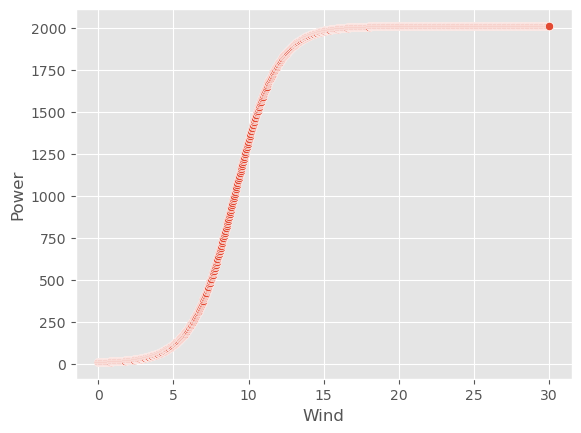

In [13]:
sns.scatterplot(x="Wind",y="Power",data=df);

- such relationships are encounted everyday - putting a car in second gear and driving up the motorway accelerating after a certain point the revs display will be in the red zone (danger of damaging the car) [1]

***
## END

< [Table of Contents](#top) | [Abstract](#abstract) | [Introduction](#introduction) | [Solution](#solution) | [Conclusion](#conclusion) >
<a id="references"></a>
***
## References
***

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1] I. McLoughlin, "Plotting an equation," GMIT, October 2020.

***
## END

< [Table of Contents](#top) | [Abstract](#abstract) | [Introduction](#introduction) | [Solution](#solution) | [Conclusion](#conclusion) | [References](#references) >
<a id="appendix"></a>
***
## Appendix
***

&#x1F6A7;

***
## END

# END JUPYTER NOTEBOOK